In [1]:
#loading packages
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#nltk.download()

In [72]:
#loading text data
text=pd.read_csv("C:/Users/Admin/Desktop/text.csv")
print(text.head())

   id sentiment                                               text
0   1   Neutral  RT @NancyLeeGrahn: How did everyone feel about...
1   2  Positive  RT @ScottWalker: Didn't catch the full #GOPdeb...
2   3   Neutral  RT @TJMShow: No mention of Tamir Rice and the ...
3   4  Positive  RT @RobGeorge: That Carly Fiorina is trending ...
4   5  Positive  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [3]:
#count Words
text['word_count'] = text['text'].apply(lambda x: len(str(x).split(" ")))
text[['text','word_count']].head()

,text,word_count
0,RT @NancyLeeGrahn: How did everyone feel about...,15
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,21
2,RT @TJMShow: No mention of Tamir Rice and the ...,15
3,RT @RobGeorge: That Carly Fiorina is trending ...,25
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,17


In [4]:
#count characters
text['char_count'] = text['text'].str.len()
text[['text','char_count']].head()

,text,char_count
0,RT @NancyLeeGrahn: How did everyone feel about...,106
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,140
2,RT @TJMShow: No mention of Tamir Rice and the ...,84
3,RT @RobGeorge: That Carly Fiorina is trending ...,140
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,140


In [5]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
text['avg_word'] = text['text'].apply(lambda x: avg_word(x))
text[['text','avg_word']].head()

,text,avg_word
0,RT @NancyLeeGrahn: How did everyone feel about...,6.133333
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,5.714286
2,RT @TJMShow: No mention of Tamir Rice and the ...,4.666667
3,RT @RobGeorge: That Carly Fiorina is trending ...,4.640000
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,7.294118


In [6]:
#count of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

text['stopwords'] = text['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
text[['text','stopwords']].head()

,text,stopwords
0,RT @NancyLeeGrahn: How did everyone feel about...,3
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,5
2,RT @TJMShow: No mention of Tamir Rice and the ...,5
3,RT @RobGeorge: That Carly Fiorina is trending ...,9
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,4


In [7]:
#Number of special characters
text['hastags'] = text['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
text[['text','hastags']].head()

,text,hastags
0,RT @NancyLeeGrahn: How did everyone feel about...,1
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,2
2,RT @TJMShow: No mention of Tamir Rice and the ...,1
3,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,2


In [8]:
#count of numerics
text['numerics'] = text['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text[['text','numerics']].head()

,text,numerics
0,RT @NancyLeeGrahn: How did everyone feel about...,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,0
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,0


In [9]:
#number of Uppercase words
text['upper'] = text['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
text[['text','upper']].head()

,text,upper
0,RT @NancyLeeGrahn: How did everyone feel about...,1
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,1
3,RT @RobGeorge: That Carly Fiorina is trending ...,2
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


In [11]:
#Basic Pre-processing
#making all as Lower case
text['text'] = text['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['text'].head()

0    rt @nancyleegrahn: how did everyone feel about...
1    rt @scottwalker: didn't catch the full #gopdeb...
2    rt @tjmshow: no mention of tamir rice and the ...
3    rt @robgeorge: that carly fiorina is trending ...
4    rt @danscavino: #gopdebate w/ @realdonaldtrump...
Name: text, dtype: object

In [12]:
#Removing Punctuation
text['text'] = text['text'].str.replace('[^\w\s]','')
text['text'].head()

0    rt nancyleegrahn how did everyone feel about t...
1    rt scottwalker didnt catch the full gopdebate ...
2    rt tjmshow no mention of tamir rice and the go...
3    rt robgeorge that carly fiorina is trending  h...
4    rt danscavino gopdebate w realdonaldtrump deli...
Name: text, dtype: object

In [13]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text['text'].head()

0    rt nancyleegrahn everyone feel climate change ...
1    rt scottwalker didnt catch full gopdebate last...
2    rt tjmshow mention tamir rice gopdebate held c...
3    rt robgeorge carly fiorina trending hours deba...
4    rt danscavino gopdebate w realdonaldtrump deli...
Name: text, dtype: object

In [14]:
# tokenization and find the frequency

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
t=[]
for i in range(len(text['text'])):
    tokenized_text=sent_tokenize(text['text'][i])
    tokenized_word=word_tokenize(text['text'][i])
    t =t+tokenized_word
#print(t)
freq = pd.Series(' '.join(text['text']).split()).value_counts()[:10]
print(freq)
fdist = FreqDist(t)
print(fdist)

gopdebate          9014
rt                 7860
gopdebates         5269
rwsurfergirl       1974
trump              1784
fox                1312
realdonaldtrump    1058
debate             1051
amp                1028
news                909
dtype: int64
<FreqDist with 19294 samples and 153049 outcomes>


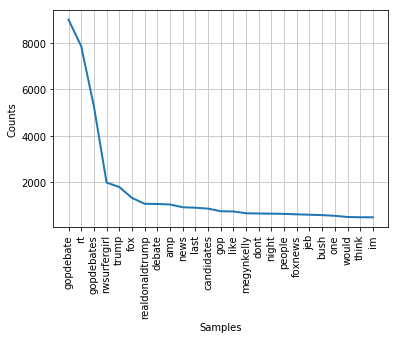

In [15]:
#plotting the frequency of words
fdist.plot(25,cumulative=False)
plt.show()

In [16]:
#Common word removal
freq = list(freq.index)
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['text'].head()

0    nancyleegrahn everyone feel climate change que...
1    scottwalker didnt catch full last night scotts...
2        tjmshow mention tamir rice held cleveland wow
3    robgeorge carly fiorina trending hours men jus...
4    danscavino w delivered highest ratings history...
Name: text, dtype: object

In [76]:
#Rare words removal
freq = pd.Series(' '.join(text['text']).split()).value_counts()[-10:]
freq.head()

http://t.co/c6ulr4O8hE    1
http://t.co/vhL…          1
http://t.co/nrUgsn3XIu    1
@PamelaRivers:            1
subscribers.so            1
dtype: int64

In [18]:
freq = list(freq.index)
text['text']= text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['text'].head()

0    nancyleegrahn everyone feel climate change que...
1    scottwalker didnt catch full last night scotts...
2        tjmshow mention tamir rice held cleveland wow
3    robgeorge carly fiorina trending hours men jus...
4    danscavino w delivered highest ratings history...
Name: text, dtype: object

In [19]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
text['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nancyleegrahn everyon feel climat chang questi...
1    scottwalk didnt catch full last night scott be...
2        tjmshow mention tamir rice held cleveland wow
3    robgeorg carli fiorina trend hour men justcomp...
4    danscavino w deliv highest rate histori presid...
Name: text, dtype: object

In [20]:
#Lemmatization
from textblob import Word
text['text'] =text['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text['text'].head()

0    nancyleegrahn everyone feel climate change que...
1    scottwalker didnt catch full last night scott ...
2        tjmshow mention tamir rice held cleveland wow
3    robgeorge carly fiorina trending hour men just...
4    danscavino w delivered highest rating history ...
Name: text, dtype: object

In [63]:
#POS Tagging
nltk.pos_tag(t)[0:5]

[('rt', 'NN'),
 ('nancyleegrahn', 'CC'),
 ('everyone', 'NN'),
 ('feel', 'NN'),
 ('climate', 'NN')]

In [24]:
#Text Processing
#N-grams(2)
from textblob import TextBlob
TextBlob(text['text'][0]).ngrams(2)

[WordList(['nancyleegrahn', 'everyone']),
 WordList(['everyone', 'feel']),
 WordList(['feel', 'climate']),
 WordList(['climate', 'change']),
 WordList(['change', 'question']),
 WordList(['question', 'last']),
 WordList(['last', 'night']),
 WordList(['night', 'exactly'])]

In [73]:
#Term frequency
tf1 = (text['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,in,1
1,some,1
2,Here,1
3,@ScottWalker:,1
4,http://t.co/ZSfF…,1


In [74]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(text.shape[0]/(len(text[text['text'].str.contains(word)])))

tf1.head()

,words,tf,idf
0,in,1,0.407450
1,some,1,3.648678
2,Here,1,5.332863
3,@ScottWalker:,1,7.458114
4,http://t.co/ZSfF…,1,9.537556


In [75]:
#Term Frequency – Inverse Document Frequency (TF-IDF)
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tfidf
0,in,1,0.407450,0.407450
1,some,1,3.648678,3.648678
2,Here,1,5.332863,5.332863
3,@ScottWalker:,1,7.458114,7.458114
4,http://t.co/ZSfF…,1,9.537556,9.537556


In [71]:
#making worldcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'once', 'yours', 'o', 'isn', 'more', "shouldn't", "wasn't", 'from', 'down', "haven't", 'hers', 'into', "needn't", 'where', 'all', "she's", 't', "mustn't", 'm', 'those', 'were', 'doesn', 'being', "hadn't", 'there', 'aren', 'hadn', 'are', 'that', 'its', 'himself', 'these', 'in', 'am', 'before', 'yourselves', 'same', 'no', 'should', 'y', "doesn't", "you're", 'between', "wouldn't", 'does', 'them', 'herself', 'too', 'ourselves', 's', "don't", 'haven', 'will', 'don', 'both', 'needn', 'an', 'a', 'only', 'on', 'to', "mightn't", 'shouldn', "couldn't", 'not', 'up', "you'd", "you'll", 'been', 'some', 'd', "isn't", 'doing', 'other', 'just', 'did', 'for', "shan't", 'above', 'out', "should've", 'weren', 'or', 'each', 'i', 'such', 'their', 'theirs', 'here', 'wouldn', 'she', 'ours', 'and', 'was', "weren't", 'ma', 'why', 'll', 'is', 'your', 'has', 'very', 'whom', 'themselves', 'me', 'hasn', 'who', 'through', 'how', 'ain', 've', 'mustn', 'itself', 'of', 'then', 'what', 'him', 'most', 'about', 'my', 'ha

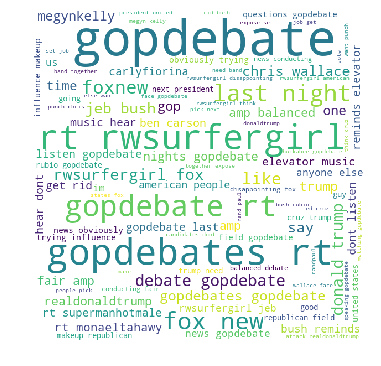

In [68]:
comment_words = ' '
for words in t: 
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 600, height = 600, 
                background_color='white' , 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [66]:
text.head()

,id,sentiment,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,1,Neutral,nancyleegrahn everyone feel climate change que...,15,106,6.133333,3,1,0,1
1,2,Positive,scottwalker didnt catch full last night scott ...,21,140,5.714286,5,2,1,1
2,3,Neutral,tjmshow mention tamir rice held cleveland wow,15,84,4.666667,5,1,0,1
3,4,Positive,robgeorge carly fiorina trending hour men just...,25,140,4.640000,9,1,0,2
4,5,Positive,danscavino w delivered highest rating history ...,17,140,7.294118,4,2,0,1


In [53]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(text['text'],text['sentiment'],test_size= 0.20,random_state=15)

In [54]:
#Encoding the predicted variable
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
ytrain = Encoder.fit_transform(ytrain)
ytest = Encoder.fit_transform(ytest)

In [55]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=5000)
vec.fit(text['text'])
trainx = vec.transform(xtrain)
testx = vec.transform(xtest)

In [56]:
print(trainx[5])

  (0, 4582)	0.21675500510955334
  (0, 4418)	0.23222849354082564
  (0, 4390)	0.2694971441533183
  (0, 3238)	0.3922553065081077
  (0, 2953)	0.27773247957526026
  (0, 2757)	0.23087708257120754
  (0, 2631)	0.1811019349131726
  (0, 2382)	0.5554649591505205
  (0, 1460)	0.336001723384971
  (0, 1434)	0.2965102209005326


In [57]:
#Fit a Naviebayes text classifier
from sklearn import model_selection, naive_bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(trainx,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
ypred = Naive.predict(testx)
from sklearn.metrics import accuracy_score
print("Naive Bayes Accuracy Score -> ",accuracy_score(ypred,ytest)*100,"%")

Naive Bayes Accuracy Score ->  66.45045045045045 %


In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(ypred,ytest, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0    1    2
Actual                   
0          1557  489  278
1            70  143   35
2            26   33  144


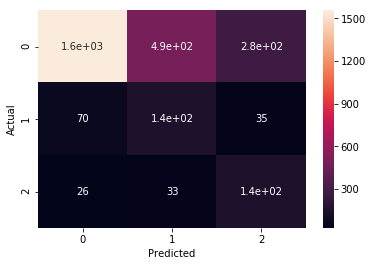

In [67]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)